# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import modules
import requests
import StringIO
import zipfile
import scipy.stats 

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [9]:
#your code here
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = StringIO.StringIO(r)
    zf = zipfile.ZipFile(s, 'r') # Read in a list of zipped files
    return zf
    
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)

tables = zf.namelist()
salaries = tables[tables.index('Salaries.csv')]

print salaries

salaries = pd.read_csv(zf.open(tables[tables.index('Salaries.csv')]))
salaries.head()




    


Salaries.csv


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [22]:
teams = pd.read_csv(zf.open(tables[tables.index('Teams.csv')]))

teams = teams[['yearID', 'teamID', 'W']]
print "Number of rows: %i" % teams.shape[0]
teams.head()


Number of rows: 2745


,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [27]:
#your code here


totSalaries = salaries.groupby(['yearID','teamID'], as_index=False).sum()
totSalaries.head()


   yearID teamID    salary
0    1985    ATL  14807000
1    1985    BAL  11560712
2    1985    BOS  10897560
3    1985    CAL  14427894
4    1985    CHA   9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [41]:
#your code here
joined = pd.merge(totSalaries, teams, on=("yearID", "teamID"))
#below is the code from the instructor, comparing with my own
# joined = pd.merge(totSalaries, teams, how="inner", on=['yearID', 'teamID'])
joined.head()


,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

     yearID teamID    salary   W
408    2000    ANA  51464167  82
409    2000    ARI  81027833  85
410    2000    ATL  84537836  95
411    2000    BAL  81447435  74
412    2000    BOS  77940333  85
413    2000    CHA  31133500  95
414    2000    CHN  60539333  65
415    2000    CIN  46867200  85
416    2000    CLE  75880771  90
417    2000    COL  61111190  82
418    2000    DET  58265167  79
419    2000    FLO  19872000  79
420    2000    HOU  51289111  72
421    2000    KCA  23433000  77
422    2000    LAN  87924286  86
423    2000    MIL  36505333  73
424    2000    MIN  16519500  69
425    2000    MON  32994333  67
426    2000    NYA  92338260  87
427    2000    NYN  79509776  94
428    2000    OAK  31971333  91
429    2000    PHI  47308000  65
430    2000    PIT  28928334  69
431    2000    SDN  54821000  76
432    2000    SEA  58915000  91
433    2000    SFN  53737826  97
434    2000    SLN  61453863  95
435    2000    TBA  62765129  69
436    2000    TEX  70795921  71
437    200

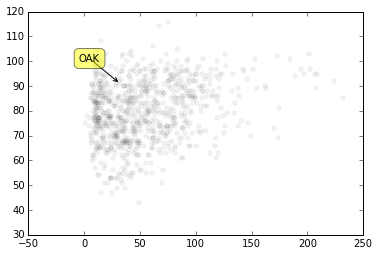

     yearID teamID     salary    W
438    2001    ANA   47535167   75
439    2001    ARI   85082999   92
440    2001    ATL   91936166   88
441    2001    BAL   67599540   63
442    2001    BOS  110035833   82
443    2001    CHA   65653667   83
444    2001    CHN   64715833   88
445    2001    CIN   48986000   66
446    2001    CLE   93152001   91
447    2001    COL   71541334   73
448    2001    DET   53416167   66
449    2001    FLO   35762500   76
450    2001    HOU   60612667   93
451    2001    KCA   35422500   65
452    2001    LAN  109105953   86
453    2001    MIL   43886833   68
454    2001    MIN   24130000   85
455    2001    MON   35159500   68
456    2001    NYA  112287143   95
457    2001    NYN   93174428   82
458    2001    OAK   33810750  102
459    2001    PHI   41663833   86
460    2001    PIT   57760833   62
461    2001    SDN   39182833   79
462    2001    SEA   74720834  116
463    2001    SFN   63280167   90
464    2001    SLN   78538333   93
465    2001    TBA  

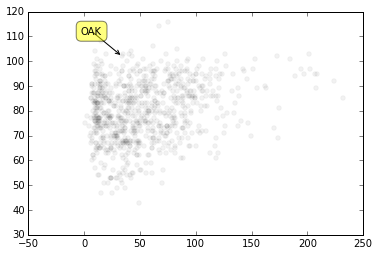

     yearID teamID     salary    W
468    2002    ANA   61721667   99
469    2002    ARI  102819999   98
470    2002    ATL   92870367  101
471    2002    BAL   60493487   67
472    2002    BOS  108366060   93
473    2002    CHA   57052833   81
474    2002    CHN   75690833   67
475    2002    CIN   45050390   78
476    2002    CLE   78909449   74
477    2002    COL   56851043   73
478    2002    DET   55048000   55
479    2002    FLO   41979917   79
480    2002    HOU   63448417   84
481    2002    KCA   47257000   62
482    2002    LAN   94850953   92
483    2002    MIL   50287833   56
484    2002    MIN   40425000   94
485    2002    MON   38670500   83
486    2002    NYA  125928583  103
487    2002    NYN   94633593   75
488    2002    OAK   40004167  103
489    2002    PHI   57954999   80
490    2002    PIT   42323599   72
491    2002    SDN   41425000   66
492    2002    SEA   80282668   93
493    2002    SFN   78299835   95
494    2002    SLN   74660875   97
495    2002    TBA  

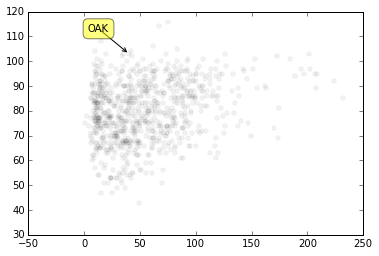

     yearID teamID     salary    W
498    2003    ANA   79031667   77
499    2003    ARI   80657000   84
500    2003    ATL  106243667  101
501    2003    BAL   73877500   71
502    2003    BOS   99946500   95
503    2003    CHA   51010000   86
504    2003    CHN   79868333   88
505    2003    CIN   59355667   69
506    2003    CLE   48584834   68
507    2003    COL   67179667   74
508    2003    DET   49168000   43
509    2003    FLO   49450000   91
510    2003    HOU   71040000   87
511    2003    KCA   40518000   83
512    2003    LAN  105572620   85
513    2003    MIL   40627000   68
514    2003    MIN   55505000   90
515    2003    MON   51948500   83
516    2003    NYA  152749814  101
517    2003    NYN  116876429   66
518    2003    OAK   50260834   96
519    2003    PHI   70780000   86
520    2003    PIT   54812429   75
521    2003    SDN   45210000   64
522    2003    SEA   86959167   93
523    2003    SFN   82852167  100
524    2003    SLN   83786666   85
525    2003    TBA  

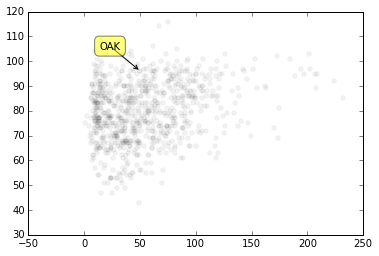

     yearID teamID     salary    W
528    2004    ANA  100534667   92
529    2004    ARI   69780750   51
530    2004    ATL   90182500   96
531    2004    BAL   51623333   78
532    2004    BOS  127298500   98
533    2004    CHA   65212500   83
534    2004    CHN   90560000   89
535    2004    CIN   46615250   76
536    2004    CLE   34319300   80
537    2004    COL   65445167   68
538    2004    DET   46832000   72
539    2004    FLO   42143042   83
540    2004    HOU   75397000   92
541    2004    KCA   47609000   58
542    2004    LAN   92902001   93
543    2004    MIL   27528500   67
544    2004    MIN   53585000   92
545    2004    MON   40897500   67
546    2004    NYA  184193950  101
547    2004    NYN   96660970   71
548    2004    OAK   59425667   91
549    2004    PHI   92919167   86
550    2004    PIT   32227929   72
551    2004    SDN   55384833   87
552    2004    SEA   81515834   63
553    2004    SFN   82019166   91
554    2004    SLN   83228333  105
555    2004    TBA  

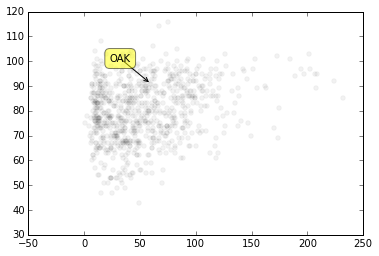

     yearID teamID     salary    W
558    2005    ARI   62329166   77
559    2005    ATL   86457302   90
560    2005    BAL   73914333   74
561    2005    BOS  123505125   95
562    2005    CHA   75178000   99
563    2005    CHN   87032933   79
564    2005    CIN   61892583   73
565    2005    CLE   41502500   93
566    2005    COL   47839000   67
567    2005    DET   69092000   71
568    2005    FLO   60408834   83
569    2005    HOU   76779000   89
570    2005    KCA   36881000   56
571    2005    LAA   94867822   95
572    2005    LAN   83039000   71
573    2005    MIL   39934833   81
574    2005    MIN   56186000   83
575    2005    NYA  208306817   95
576    2005    NYN  101305821   83
577    2005    OAK   55425762   88
578    2005    PHI   95522000   88
579    2005    PIT   38133000   67
580    2005    SDN   63290833   82
581    2005    SEA   87754334   69
582    2005    SFN   90199500   75
583    2005    SLN   92106833  100
584    2005    TBA   29679067   67
585    2005    TEX  

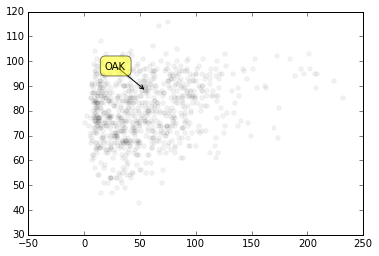

     yearID teamID     salary   W
588    2006    ARI   59684226  76
589    2006    ATL   90156876  79
590    2006    BAL   72585582  70
591    2006    BOS  120099824  86
592    2006    CHA  102750667  90
593    2006    CHN   94424499  66
594    2006    CIN   60909519  80
595    2006    CLE   56031500  78
596    2006    COL   41233000  76
597    2006    DET   82612866  95
598    2006    FLO   14671500  78
599    2006    HOU   88694435  82
600    2006    KCA   47294000  62
601    2006    LAA  103472000  89
602    2006    LAN   98447187  88
603    2006    MIL   57568333  75
604    2006    MIN   63396006  96
605    2006    NYA  194663079  97
606    2006    NYN  101084963  97
607    2006    OAK   62243079  93
608    2006    PHI   88273333  85
609    2006    PIT   46717750  67
610    2006    SDN   69896141  88
611    2006    SEA   87959833  78
612    2006    SFN   90056419  76
613    2006    SLN   88891371  83
614    2006    TBA   34917967  61
615    2006    TEX   68228662  80
616    2006   

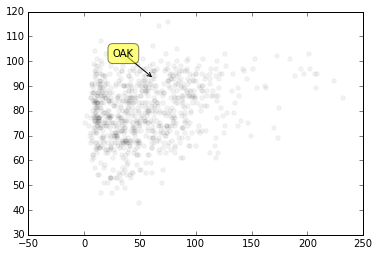

     yearID teamID     salary   W
618    2007    ARI   52067546  90
619    2007    ATL   87290833  84
620    2007    BAL   93174808  69
621    2007    BOS  143026214  96
622    2007    CHA  108671833  72
623    2007    CHN   99670332  85
624    2007    CIN   68524980  72
625    2007    CLE   61673267  96
626    2007    COL   54041000  90
627    2007    DET   94800369  88
628    2007    FLO   30507000  71
629    2007    HOU   87759000  73
630    2007    KCA   67116500  69
631    2007    LAA  109251333  94
632    2007    LAN  108454524  82
633    2007    MIL   70986500  83
634    2007    MIN   71439500  79
635    2007    NYA  189259045  94
636    2007    NYN  115231663  88
637    2007    OAK   79366940  76
638    2007    PHI   89428213  89
639    2007    PIT   38537833  68
640    2007    SDN   58110567  89
641    2007    SEA  106460833  88
642    2007    SFN   90219056  71
643    2007    SLN   90286823  78
644    2007    TBA   24123500  66
645    2007    TEX   68318675  75
646    2007   

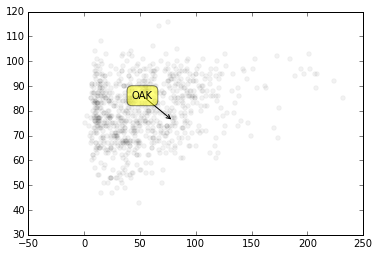

In [52]:
#your code here

# merged.plot(x="salary", y="wins", kind="scatter", color ='b', alpha= 0.05)
# df = joined[joined['yearID'] == 2008]
# print df
# for idx in merged["yearID"]:
#     merged.plot(x)
years = range(2000,2008)
teamName = 'OAK'

for yr in years:
    df = joined[joined['yearID'] == yr]
#     print df
    plt.title = "total wins vs total salaries(in millions)"
    plt.xlabel = "total salary(in millions)"
    plt.ylabel = "Wins"
    plt.scatter(joined['salary']/1e6, joined['W'], color='black', alpha=0.05)
    plt.annotate(teamName, 
        xy = (df['salary'][df['teamID'] == teamName] / 1e6,  df['W'][df['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    
    plt.show()
# merged.plot(x='x', y='price', kind = 'scatter', color = 'm', alpha = 0.05)

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [ ]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [ ]:
#your code here

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [ ]:
#your code here

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [ ]:
#your code here

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [ ]:
#your code here

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [ ]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [ ]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [ ]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [ ]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [ ]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [ ]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
